In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
pd.options.display.float_format = '{:}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [6]:
#load data 
df1 = pd.DataFrame(pd.read_excel("/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/Data/ny_crime_2013.xls", skiprows = 4))
df2 = pd.DataFrame(pd.read_excel("/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/Data/ny_crime_2014.xls", skiprows = 4))

In [14]:

def clean_df(df1):
    df1_clean = df1.rename(columns={ df1.columns[2]: "violent_crime",df1.columns[3]: "murder",
                        df1.columns[4]: "rape",df1.columns[5]: "rape2",
                        df1.columns[7]: "A_assault",df1.columns[8]: "property_crime",
                        df1.columns[10]: "larceny_theft",df1.columns[11]: "motor_theft"})
    columns_to_drop = {"City", "violent_crime", "rape", "rape2", "A_assault", "Arson3"}
    return df1_clean.drop(columns_to_drop, axis =1).dropna()

df1_clean = clean_df(df1)
df2_clean = clean_df(df2)

df1_clean.head(1)

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft
0,1861.0,0.0,0.0,12.0,2.0,10.0,0.0


In [24]:
def log_columns(df, c_list):
    for c in c_list:
        df["log_"+c+"_cap"] = ((100*df[c]/df["Population"])+1).apply(np.log)
    df["log_Population"] = df["Population"].apply(np.log)
        
c_to_log = ("property_crime","murder", "Robbery", "Burglary", "larceny_theft", "motor_theft")

log_columns(df1_clean, c_to_log)
log_columns(df2_clean, c_to_log)
df2_clean.head(2)

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft,log_property_crime_cap,log_murder_cap,log_Robbery_cap,log_Burglary_cap,log_larceny_theft_cap,log_motor_theft_cap,log_Population
0,1851.0,0.0,0.0,11.0,1.0,10.0,0.0,0.4664180623694419,0.0,0.0,0.052616028049613725,0.43194377633917447,0.0,7.523481312573497
1,2568.0,0.0,1.0,49.0,1.0,47.0,1.0,1.0674998398517614,0.0,0.03820174222566249,0.03820174222566249,1.04035376470621,0.03820174222566249,7.850882664809852


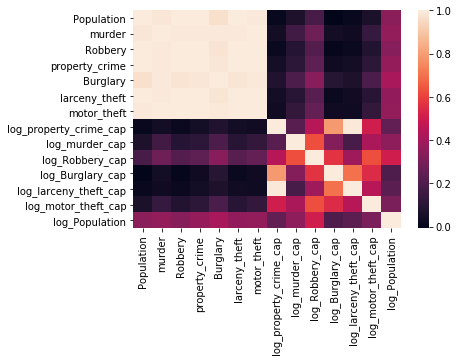

In [25]:
sns.heatmap(df1_clean.corr())

In [34]:
y = "log_property_crime_cap"
x = "log_Population+log_Burglary_cap+log_larceny_theft_cap"

linear_formula = y + " ~ " + x

lm = smf.ols(formula = linear_formula, data = df1_clean).fit()
print(lm.params)
print("\n\nP values:\n", lm.pvalues)
print("\n\nr_squard:\n", lm.rsquared)

Intercept                0.03998705757759875
log_Population          0.004256796230703869
log_Burglary_cap         0.44097690874426954
log_larceny_theft_cap     0.9164574341796486
dtype: float64


P values:
 Intercept                0.0005700791091597245
log_Population           0.0012156354573522443
log_Burglary_cap        3.239785315033266e-128
log_larceny_theft_cap                      0.0
dtype: float64


r_squard:
 0.9959253575934927


In [46]:
regr = linear_model.LinearRegression()
x1 = ["log_Population","log_Burglary_cap","log_larceny_theft_cap"]
# Fit our model to our data.
regr.fit(df1_clean[x1], df1_clean[y])

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, df1_clean[x1], df1_clean[y],  cv=10)
r_scores = np.sqrt(scores)

def display_scores(scores):
    print("\n\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores)

Coefficients: 
 [0.0042568  0.44097691 0.91645743]
Intercept: 
 0.03998705757759824


Scores: [0.99638831 0.9976281  0.99599598 0.99520965 0.99615759 0.99613119
 0.99452137 0.99661481 0.99425924 0.99490182]
Mean: 0.9957808068447406
Standard deviation: 0.000989360746466635


In [48]:
lm1 = smf.ols(formula = linear_formula, data = df2_clean).fit()
print(lm1.params)
print("\n\nP values:\n", lm1.pvalues)
print("\n\nr_squard:\n", lm1.rsquared)

Intercept                 0.01780036884824167
log_Population          0.0064562258266950435
log_Burglary_cap          0.42159627426954727
log_larceny_theft_cap       0.923725100250489
dtype: float64


P values:
 Intercept                   0.1743379792131734
log_Population          2.1778805581759642e-05
log_Burglary_cap        1.7967352405312063e-94
log_larceny_theft_cap                      0.0
dtype: float64


r_squard:
 0.9945291340152662


In [49]:
regr1 = linear_model.LinearRegression()
x1 = ["log_Population","log_Burglary_cap","log_larceny_theft_cap"]
# Fit our model to our data.
regr1.fit(df2_clean[x1], df2_clean[y])

# Display the attributes we calculated.
print('Coefficients: \n', regr1.coef_)
print('Intercept: \n', regr1.intercept_)

from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(regr, df2_clean[x1], df2_clean[y],  cv=10)
r_scores = np.sqrt(scores)

def display_scores(scores):
    print("\n\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores1)

Coefficients: 
 [0.00645623 0.42159627 0.9237251 ]
Intercept: 
 0.017800368848242543


Scores: [0.99141603 0.99579545 0.99577598 0.99260326 0.99527507 0.99567045
 0.98636112 0.99462441 0.99658711 0.99457726]
Mean: 0.9938686147513222
Standard deviation: 0.002915781457371071


In [ ]:
#sns.heatmap(df2_clean.corr())